# Statistical Learning - Project 2

### Objective:
 Deep dive into Insurance dataset to find some valuable insights.

### Attribute Information:

<b>age</b> : Age of primary beneficiary<br>
<b>sex</b> : Insurance contractor gender, female, male <br>
<b>bmi</b> : Body mass index, providing an understanding of body,weights that are relatively high or low relative to height,
             objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 <br>
<b>children</b> : Number of children covered by health insurance / Number of dependents <br>
<b>smoker</b> : Smoking <br>
<b>region</b> : the beneficiary''s residential area in the US, northeast, southeast, southwest, northwest.<br>
<b>charges</b> : Individual medical costs billed by health insurance.

### 1. Import the libraries 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats
import copy
from sklearn.preprocessing import LabelEncoder

### 2. Read the data as data frame

In [37]:
#Read the data from insurance.csv and store into dataframe
dfinsurance = pd.read_csv("insurance.csv")
dfinsurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3. Perform basic EDA
### 3.a. Shape of the data

In [38]:
#To find the number of rows and columns in dataframe
dfinsurance.shape

(1338, 7)

### 3.b. Data type of each attribute

In [39]:
#To find the data types for each attributes
dfinsurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### 3.c. Checking the presence of missing values

In [40]:
#To identify the missing values in each attributs
dfinsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


 - No missing values found. All the attributes are having values

### 3.d. 5 Point summary of numerical attributes

In [41]:
# To get the 5 point summary using describe 
dfinsurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### 3.e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

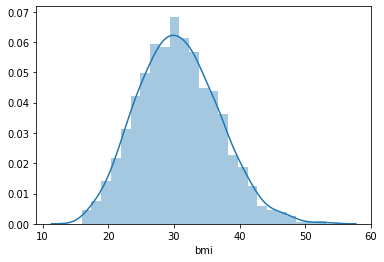

In [42]:
## For 'bmi' attribute
sn.distplot(dfinsurance["bmi"], kde=True)

- Above graph shows that bmi looks like normally distributed 

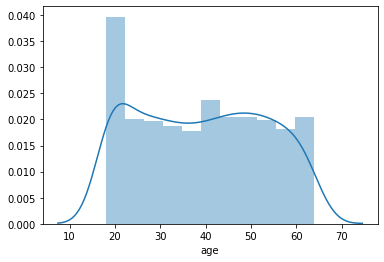

In [43]:
## For 'age' attribute
sn.distplot(dfinsurance["age"], kde=True)

- Age looks like uniformly distributed 

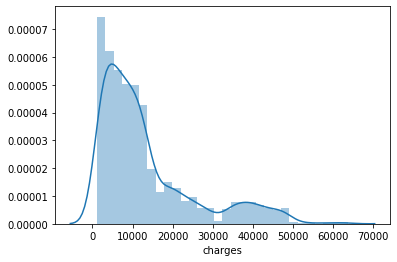

In [44]:
## For 'charges' attribute
sn.distplot(dfinsurance["charges"], kde=True)

- Above graph shows that charges are highly right skewed

### 3.f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [45]:
# Measure the skewness using stats library 
skewness = pd.DataFrame({'Skewness': [stats.skew(dfinsurance['bmi']), 
                                      stats.skew(dfinsurance['age']), 
                                      stats.skew(dfinsurance['charges'])] }, index=['bmi','age','charges'])
skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


- Skew of bmi is very less
- age normally distributed 
- charges are highly skewed

### 3.g. Checking the presence of outliers in 'bmi','age' and 'charges' column 

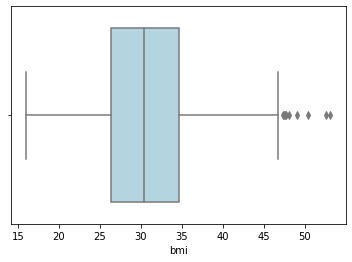

In [46]:
#To check the outliers in bmi using box-plot
sn.boxplot(dfinsurance["bmi"], color='lightblue')

- bmi has a few extreme values

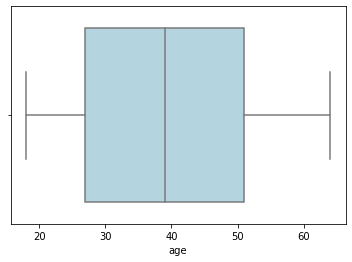

In [47]:
#To check the outliers in age using box-plot
sn.boxplot(dfinsurance["age"], color='lightblue')

- age has no outliers

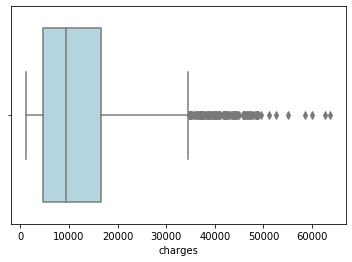

In [48]:
#To check the outliers in charges using box-plot
sn.boxplot(dfinsurance["charges"], color='lightblue')

- There are more outliers in charges attribute

### 3.h. Distribution of categorical columns (include children)

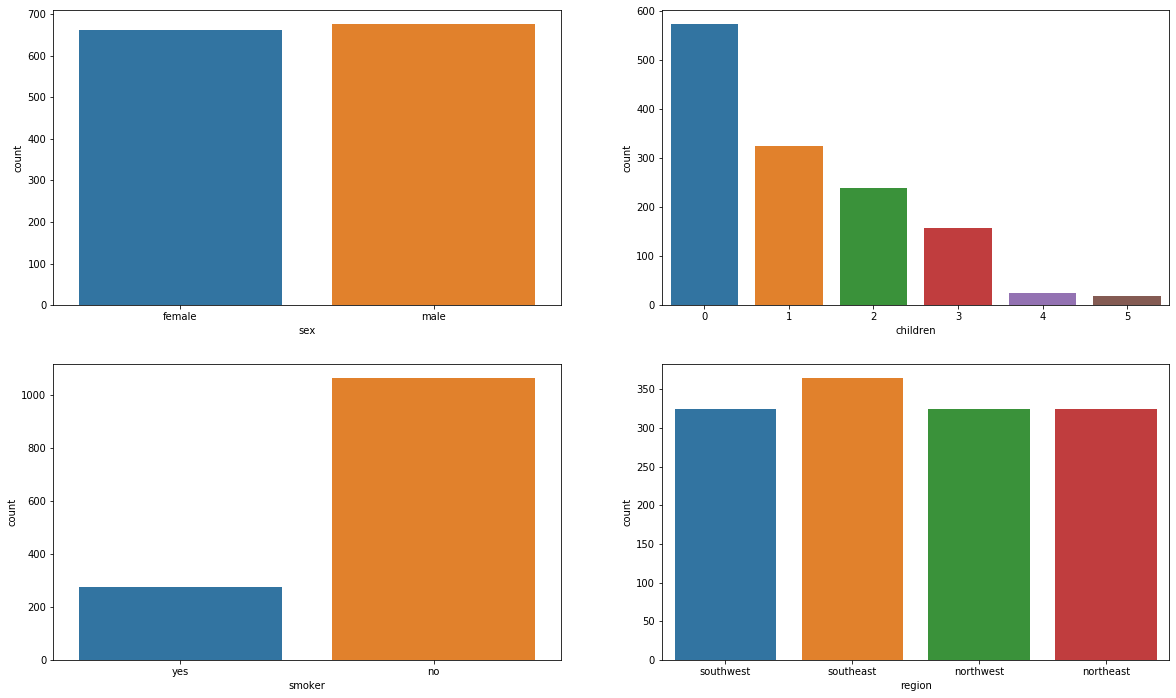

In [49]:
# Plot the distribution for Sex, Children, Smoker and Region

plt.figure(figsize=(20,25))

plt.subplot(4,2,1)
sn.countplot(dfinsurance['sex'])
plt.subplot(4,2,2)
sn.countplot(dfinsurance['children'])
plt.subplot(4,2,3)
sn.countplot(dfinsurance['smoker'])
plt.subplot(4,2,4)
sn.countplot(dfinsurance['region'])

- Gender is also distributed evenly
- More customers are not having children and very less custmers are having 5 children
- The count of non-smoker is quite high
- The customers are distributed evenly in southwest, northwest and northeast regions. The count of customers is little bit   higher than other regions. 

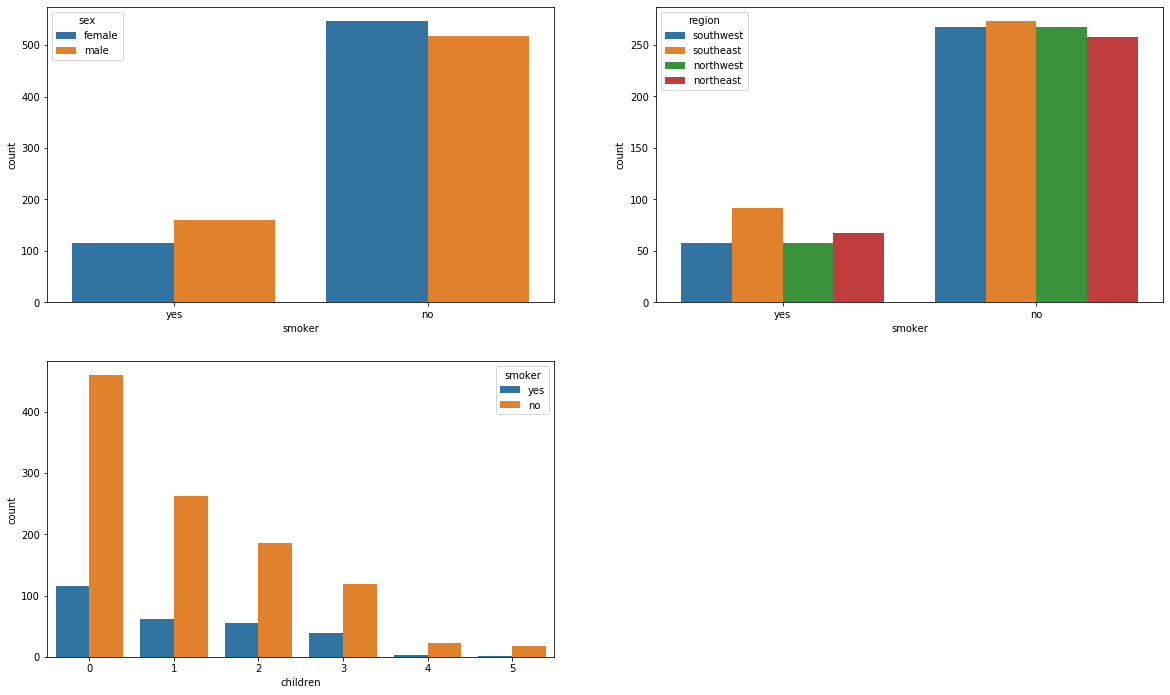

In [50]:
# To get more insights smoker vs Sex, smoker vs region and smoker vs children
plt.figure(figsize=(20,25))

plt.subplot(4,2,1)
sn.countplot(dfinsurance['smoker'], hue=dfinsurance['sex'])
plt.subplot(4,2,2)
sn.countplot(dfinsurance['smoker'], hue=dfinsurance['region'])
plt.subplot(4,2,3)
sn.countplot(dfinsurance['children'], hue=dfinsurance['smoker'])

- This shows that habit of smoking is not gender specifc
- The count of smoker is little bit high in southeast region when compare to other regions.
- 400+ non smokers and below 120 smokers who don't have children. Very less smokers have 5 children.

### 3.i. Pair plot that includes all the columns of the data frame

In [51]:
# Pair plot does not support categorical values. Hence convert into numerical value using LabelEncoder

# Copy the data into another data frame
dfencoded = copy.deepcopy(dfinsurance)

# create new columns. It will help to verify the categorical and numerical value mapping
dfencoded['sex_cat'] = dfencoded['sex']
dfencoded['smoker_cat'] = dfencoded['smoker']
dfencoded['region_cat'] = dfencoded['region']

# Apply LabelEncoder
le = LabelEncoder()
dfencoded.loc[:,['sex', 'smoker', 'region']] = dfencoded.loc[:,['sex', 'smoker', 'region']].apply(le.fit_transform)

# Create data frame to verify the mapping between categorical and numerical value
df_region = dfencoded[['region_cat', 'region']]
df_gender = dfencoded[['sex_cat', 'sex']]
df_smoker = dfencoded[['smoker_cat', 'smoker']]

In [52]:
# Get the unique rows and verify the LabelEncoder mapping for region
df_region.drop_duplicates(['region_cat','region'])[['region_cat','region']]

,region_cat,region
0,southwest,3
1,southeast,2
3,northwest,1
8,northeast,0


In [53]:
# Get the unique rows and verify the LabelEncoder mapping for gender
df_gender.drop_duplicates(['sex_cat','sex'])[['sex_cat','sex']]

,sex_cat,sex
0,female,0
1,male,1


In [54]:
# Get the unique rows and verify the LabelEncoder mapping for smoker
df_smoker.drop_duplicates(['smoker_cat','smoker'])[['smoker_cat','smoker']]

,smoker_cat,smoker
0,yes,1
1,no,0


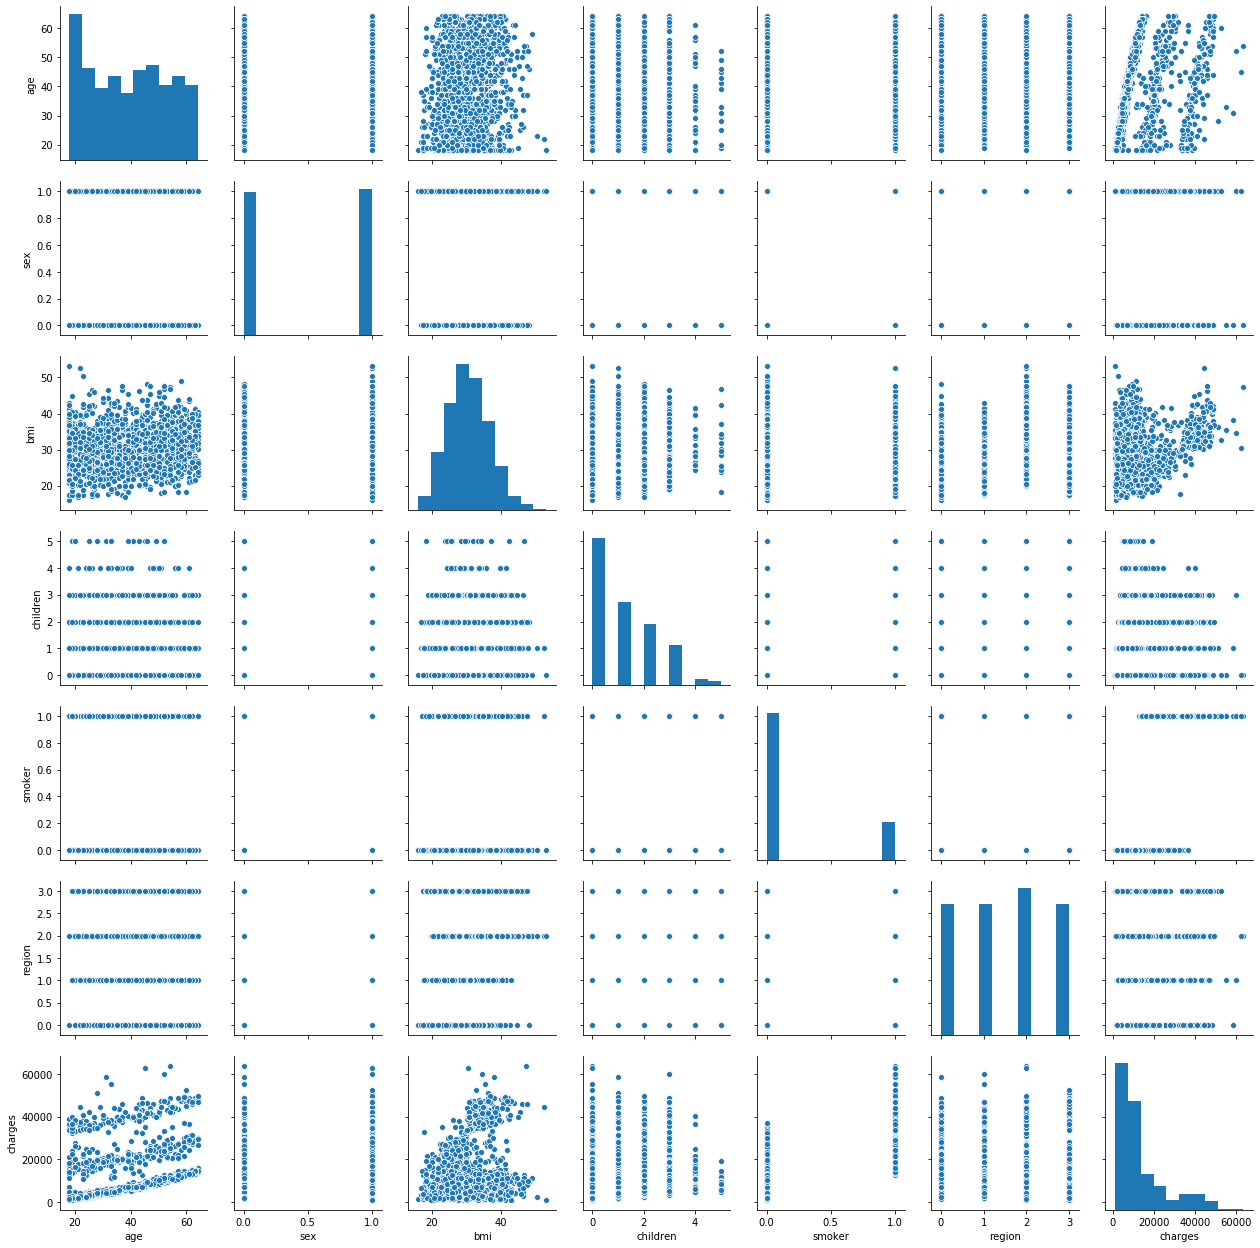

In [55]:
# Pair plot for all the columns
sn.pairplot(dfencoded)

- Smokers claimed more money than non-smokers
- 3 set of charges which increase gradually with age. 
- There is no relationship between 'age' and 'bmi'
- No releationship between 'age' and 'children'
- The range of 'charges' decreases as the value of 'children' increases.
- There is 'bmi' slight decreases as count of 'children' increases. However, there are few high values in 'bmi' for children 
  values is 5

## 4. Answer the following questions with statistical evidence

### 4.a. Do charges of people who smoke differ significantly from the people who don't?

In [22]:
# To check that Charges are having normal distribution.

stat, p_value = stats.shapiro(dfinsurance['charges'])
print('P-value:', p_value)
if p_value > 0.05:
    print('Distribution is normal')
else:
    print('Distribution is not normal')

P-value: 1.150477698013898e-36
Distribution is not normal


The result of Shapiro test shows that distribution is not same for Charges. Hence, we can go ahead with non-parametric 
test <b>mannwhitneyu</b> to test whether the distributions of two independent samples are equal or not.

- Null Hypothesis (Ho): Charges of smoker and non-smoker are same
- Alternate Hypothesis (Ha): Charges of smoker and non-smoker are not same. It has effect on smoking
- Benchmark(alpha): 5%

In [23]:
# Split the smoker and non-smoker dataset for charges
dfsmoker = dfinsurance[dfinsurance['smoker'] == 'yes']['charges']
dfnonsmoker = dfinsurance[dfinsurance['smoker'] == 'no']['charges']

# Apply the mannwhitneyu test
stat, p_value = stats.mannwhitneyu(dfsmoker, dfnonsmoker)

print('P-value:', p_value)
if p_value > 0.05:
    print('Accepting Null Hypothesis as p-value is greater than 5%')
else:
    print('Rejecting Null Hypothesis as p-value is less than 5%')

P-value: 2.6351167222517853e-130
Rejecting Null Hypothesis as p-value is less than 5%


<b>Visual Representation:</b>

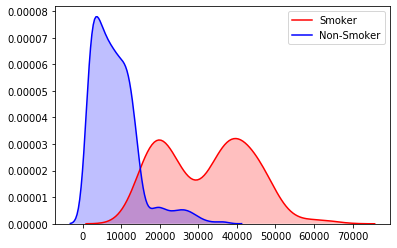

In [24]:

sn.kdeplot(dfinsurance.loc[(dfinsurance['smoker']=='yes'), 
            'charges'], color='r', shade=True, Label='Smoker') 
sn.kdeplot(dfinsurance.loc[(dfinsurance['smoker']=='no'), 
            'charges'], color='b', shade=True, Label='Non-Smoker') 

###### Conclusion:
- Charges of smoker and non-smoker are not same. It has effect of smoking.

### 4.b. Does bmi of males differ significantly from that of females?

In [25]:
# To check that there is normal distribution for BMI 

stat, p_value = stats.shapiro(dfinsurance['bmi'])
print('P-value:', p_value)
if p_value > 0.05:
    print('Distribution is normal')
else:
    print('Distribution is not normal')

P-value: 2.609841976664029e-05
Distribution is not normal


The result of Shapiro test shows that distribution is not same for bmi. Hence, we can go ahead with non-parametric test <b>mannwhitneyu</b> to test whether the distributions of two independent samples are equal or not.

- Null Hypothesis (Ho): Bmi of Male and Female are same
- Alternate Hypothesis (Ha): Bmi of Male and Female are not same. Gender has an impact on Bmi
- Benchmark(alpha): 5%

In [26]:
# Split the male and female dataset for bmi
dfmale = dfinsurance[dfinsurance['sex'] == 'male']['bmi']
dffemale = dfinsurance[dfinsurance['sex'] == 'female']['bmi']

# Apply the mannwhitneyu as considering it 2 independent samples. 
stat, p_value = stats.mannwhitneyu(dfmale,dffemale)

print("P-value:", p_value)

if p_value < 0.05:
    print("Rejecting Null Hypothesis as p-value is less than 5%")
else:
    print("Accepting Null Hypothesis as p-value is greater than 5%")

P-value: 0.05070064020142721
Accepting Null Hypothesis as p-value is greater than 5%


The result of mannwhitneyu test shows that Gender has no impact on BMI since p-value is less than 5% 


<b>Visual Representation:</b>

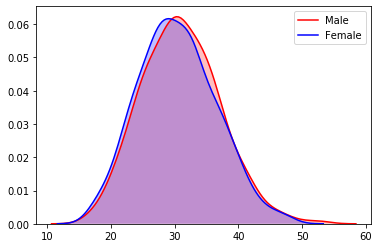

In [27]:
sn.kdeplot(dfinsurance.loc[(dfinsurance['sex']=='male'),
            'bmi'], color='r', shade=True, label='Male') 
sn.kdeplot(dfinsurance.loc[(dfinsurance['sex']=='female'), 
            'bmi'], color='b', shade=True, label='Female') 

###### Conclusion:
- Gender has no impact on bmi.

### 4.c. Is the proportion of smokers significantly different in different genders?

- Null Hypothesis (Ho): Gender has no effect on smoking habits
- Alternate Hypothesis (Ha): Gender has an effect on smoking habits
- Benchmark(alpha): 5%

In [28]:
# To convert Contigency table
crosstab = pd.crosstab(dfinsurance['sex'],dfinsurance['smoker']) 

# Apply chisquare test as both are categorical variables
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print("P-value:", p_value)

if p_value < 0.05:
    print("Rejecting Null Hypothesis as p-value is less than 5%")
else:
    print("Accepting Null Hypothesis as p-value is greater than 5%")

P-value: 0.006548143503580696
Rejecting Null Hypothesis as p-value is less than 5%


###### Conclusion:
- Smoking habits differs with the gender. 
- Gender has an effect on smoking habits as the p_value less than 5%

### 4.d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [29]:
# To check that there is normal distribution for BMI.

stat, p_value = stats.shapiro(dfinsurance['bmi'])
print('P-value:', p_value)
if p_value > 0.05:
    print('Distribution is normal')
else:
    print('Distribution is not normal')

P-value: 2.609841976664029e-05
Distribution is not normal


In [35]:
#To split the dataset based on number of children with bmi
nochildren = dfinsurance[(dfinsurance['sex']=="female") & (dfinsurance['children'] == 0)]['bmi']
onechildren = dfinsurance[(dfinsurance['sex']=="female") & (dfinsurance['children'] == 1)]['bmi']
twochildren = dfinsurance[(dfinsurance['sex']=="female") & (dfinsurance['children'] == 2)]['bmi']

# To perform Levene test whether there is equal variance between the groups.
stat, p_value = stats.levene(nochildren,onechildren,twochildren)
print('P-value:', p_value)

if p_value <0.05:
    print("Variances are not equal")
else:
    print("Variances are equal")
    


P-value: 0.3899432394522804
Variances are equal


The results of Shapiro and Levene show that distribution of bmi is not normal and variances are equal. Since bmi distribution is not normal we can go ahead with non-parametric test <b>kruskal</b> as there are more than two groups. 

- Null Hypothesis (Ho): The distribution of bmi across women with no children, one child and two children is same. 
- Alternate Hypothesis (Ha): The distribution of bmi across women with no children, one child and two children is not same.
- Benchmark(alpha): 5%

In [31]:
# Apply kruskal test to test whether the distribution of bmi across women with no children, one child and two children 
# is same or not

stat, p_value = stats.kruskal(nochildren,onechildren,twochildren)

print("P-value:", p_value)

if p_value < 0.05:
    print("Rejecting Null Hypothesis as p-value is less than 5%")
else:
    print("Accepting Null Hypothesis as p-value is greater than 5%")

P-value: 0.699844648205425
Accepting Null Hypothesis as p-value is greater than 5%


It shows that number of children is not making any difference in women bmi.

###### Visual Representation:

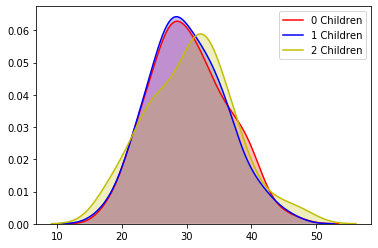

In [32]:

sn.kdeplot(nochildren.values.tolist(),
             color='r', shade=True, label='0 Children',legend=True) 
sn.kdeplot(onechildren.values.tolist(),
             color='b', shade=True, label='1 Children',legend=True)
sn.kdeplot(twochildren.values.tolist(),
             color='y', shade=True, label='2 Children',legend=True)

###### Conclusion:
- The distributions of ‘bmi’ are nearly same across women with 0, 1 or 2 children.

### End Project